In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


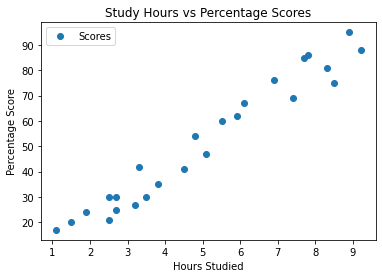

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

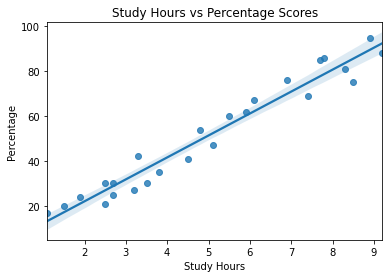

In [6]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [11]:
x = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #labels

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
print("Training model..")

Training model..


In [16]:
line=reg.coef_*x+reg.intercept_

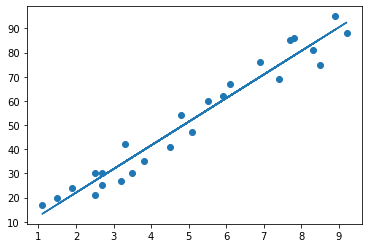

In [17]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [19]:
print(x_test)
y_pred=reg.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [21]:
d=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
d

,Actual,predicted
0,81,83.622842
1,30,26.923182
2,21,26.923182
3,76,69.936717
4,62,60.160913


In [22]:
print("Training score:",reg.score(x_train,y_train))
print("Testing score:",reg.score(x_test,y_test))

Training score: 0.9490080569873761
Testing score: 0.9688729321025159


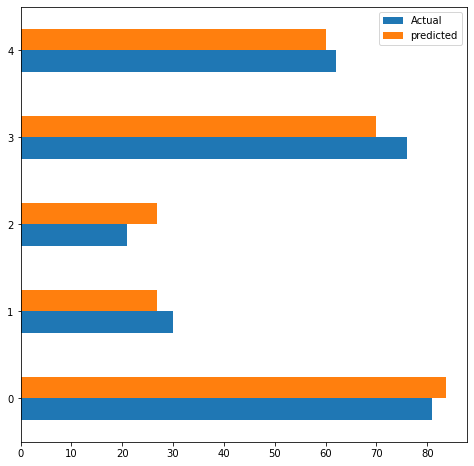

In [23]:
d.plot(kind='barh',figsize=(8,8))
plt.show()

In [25]:
hrs=9.25
test=np.array([hrs])
test=test.reshape(-1,1)
pred1=reg.predict(test)
print("No of hours:",hrs)
print("predicted score:",pred1[0])

No of hours: 9.25
predicted score: 92.9098547701573


In [26]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('explained variance score:', metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 3.905042267216639
Mean Squared Error: 18.31516675087965
Root Mean Squared Error: 4.279622267312812
explained variance score: 0.9692753990879337
